# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14100,2132,3445,1336,1491,548
1,6990,3880,5380,1647,319,1160
2,5224,7603,8584,2540,3674,238


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
104   69.5  34.5     41.8    45.7              60.2          31.8
117   43.4  54.0     55.7    51.8              30.0          58.9
164   35.0  77.5     68.9    65.6              73.4          13.6


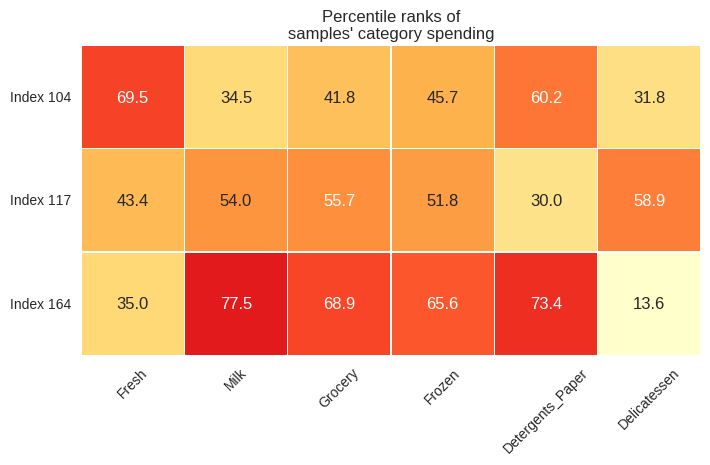

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# It would be nice to write somewhere to choose customers within that 25-75 range...
# I initially were very focused on the "vary significantly", so I chose extreme values...
# TODO: Select three indices of your choice you wish to sample from the dataset
# indices = [181,183,325]

indices = [104,117,164]
#indices = range(160,170)
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

# Thanks to the reviewer for this code :-)
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
#### Customer1 - relatively high volume of Fresh products, index 104
A customer who is in near the 75 percentile for fresh products in the dataset might sell those withing less than a week. The Grocery, Frozen and Detergents_Paper are in the 50%+-10% range in the dataset. Where the Milk and Delicatessn are between 30% and 35% compared to the other customers in the dataset.
So, it could be a place where people go regularly (fresh products, detergents_paper) and the mix of products (Fresh:Grocery:Milk:Delicatessen) reminds me on supermarkets in germany. Although in china or other countries the ratios might differ. Although the 60% percentile of Detergents_Paper could mean a hotel with a good restarant as well.

#### Customer2 -balanced customer, index 117
A customer within the 50%  +- 9% for the product categories, except for Detergents_Paper, could implicate an "All-you-can eat" restaurant, whith undersized sanitary area (maybe outsourced).

#### Customer3 - low volume of Fresh and Delicatessen stuff, index 164
A customer within the 75%+-5% for Milk, Grocery and Detergents_Papers could be a distributor for that kind of goods. Also with about 66% for Frozen goods could be rather a retail store than a restaurant or hotel.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [91]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
irs = 42
predict_me = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicatessen"]
for choice in predict_me:
    new_data = data.drop(choice, axis = 1, inplace = False)
    labels = data[choice]

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size = 0.25, random_state = irs)

    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = irs).fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    print "By trying to predict "+choice+" we get a score of: "+str(score)

# Try one-to-one ...

for predict in predict_me:
    new_data = data.drop(predict, axis = 1, inplace = False)
    labels = data[predict]

    for choice in new_data.keys():
        single_data = pd.DataFrame(new_data[choice])
        X_train, X_test, y_train, y_test = train_test_split(single_data, labels, test_size = 0.25, random_state = irs)
        regressor = DecisionTreeRegressor(random_state = irs).fit(X_train,y_train)
        score = regressor.score(X_test,y_test)
        print "By trying to predict "+predict+" based on "+choice+" we get a score of: "+str(score)

By trying to predict Fresh we get a score of: -0.385749710204
By trying to predict Milk we get a score of: 0.156275395017
By trying to predict Grocery we get a score of: 0.681884008544
By trying to predict Frozen we get a score of: -0.210135890125
By trying to predict Detergents_Paper we get a score of: 0.271666980627
By trying to predict Delicatessen we get a score of: -2.2547115372
By trying to predict Fresh based on Milk we get a score of: -0.545676286905
By trying to predict Fresh based on Grocery we get a score of: -0.499393916562
By trying to predict Fresh based on Frozen we get a score of: -0.0850886801889
By trying to predict Fresh based on Detergents_Paper we get a score of: -0.573162340428
By trying to predict Fresh based on Delicatessen we get a score of: -0.452696879769
By trying to predict Milk based on Fresh we get a score of: -1.98208441791
By trying to predict Milk based on Grocery we get a score of: -0.289922038781
By trying to predict Milk based on Frozen we get a sco

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I began with trying to predict the spending habits by leaving out the Fresh feature. This didn't went well and with a score of about -.39 it fails to pretending the customers' buying. My thaught was, that people who might buy lots of Fresh stuff spend equally on Grocery and Milk.
After that failure I left each out one-by-one. It turned out that customers who are buying Grocery are spending equally less/much on the other Items. So, a score of about 0.68 for that case implies, that based one the model it is possible to make a fairly good prediction on how much Grocery that customer might spend.
Finally I was curious if there is any way, that one feature can predict another one. The best score of about 0.56 gave the combination of Detergents paper as input and Grocery to predict. It's intresting to see, that by changing input with output that the scores are not the same. Furthermore it's nice to see, that the model totally fails if you were to predict Delicatessen based on Grocery.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64


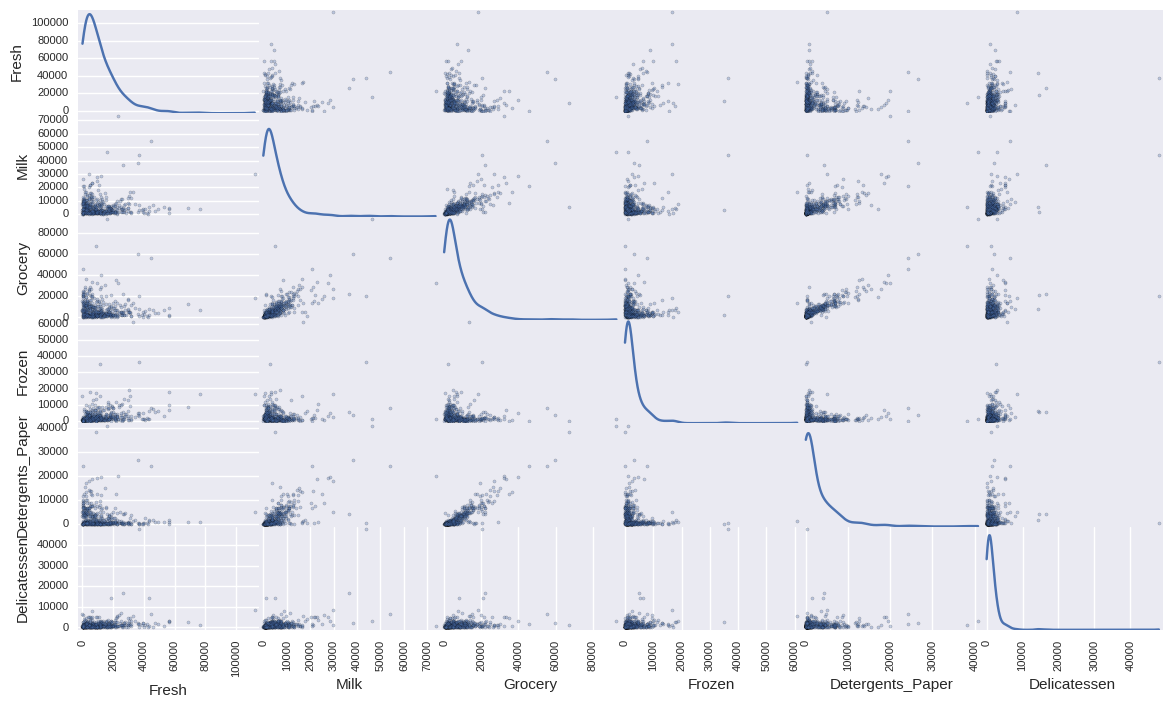

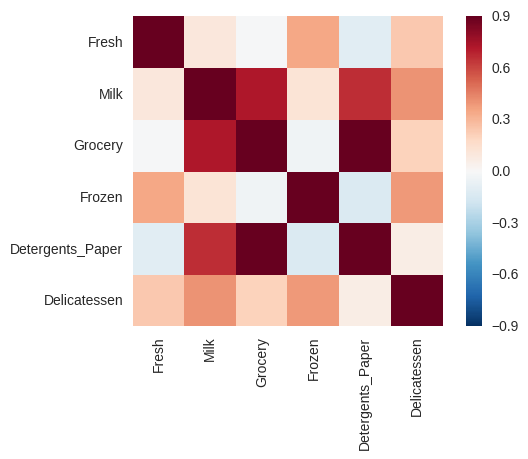

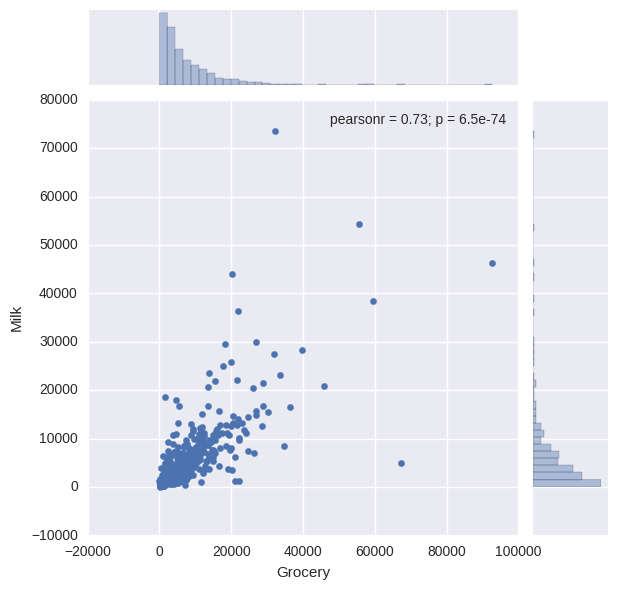

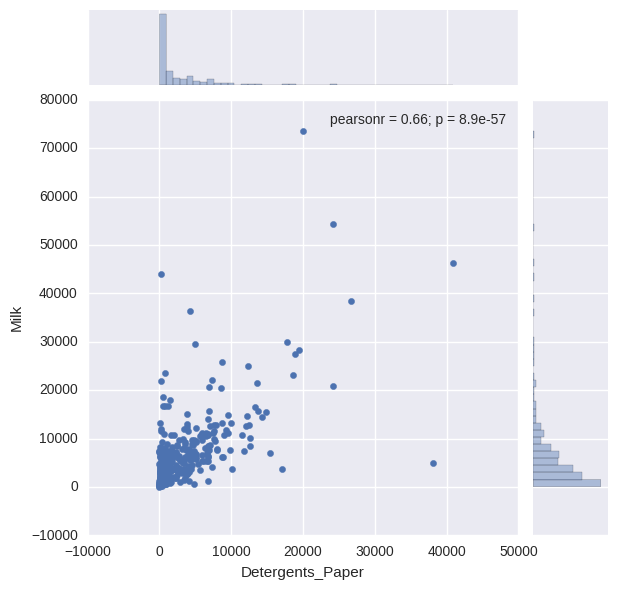

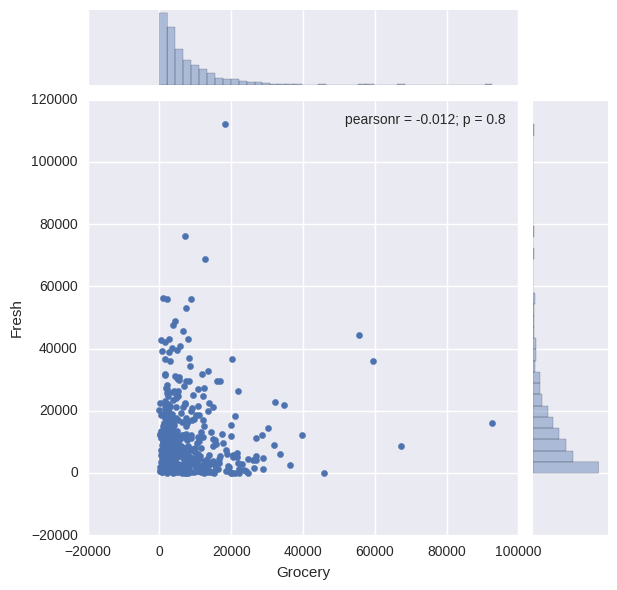

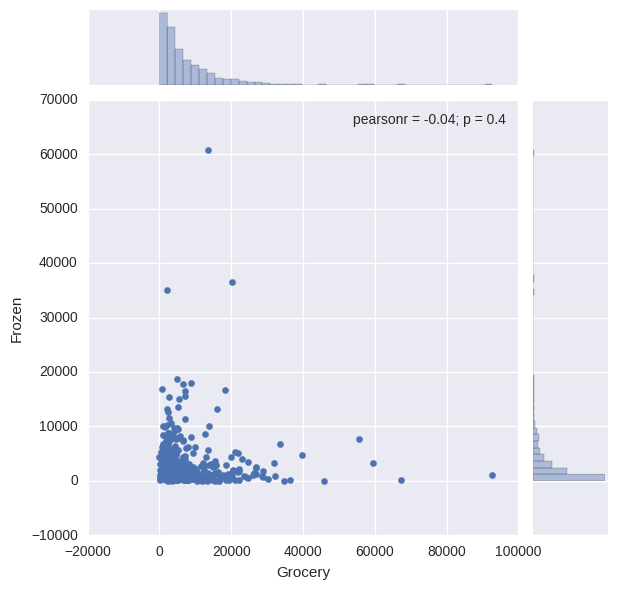

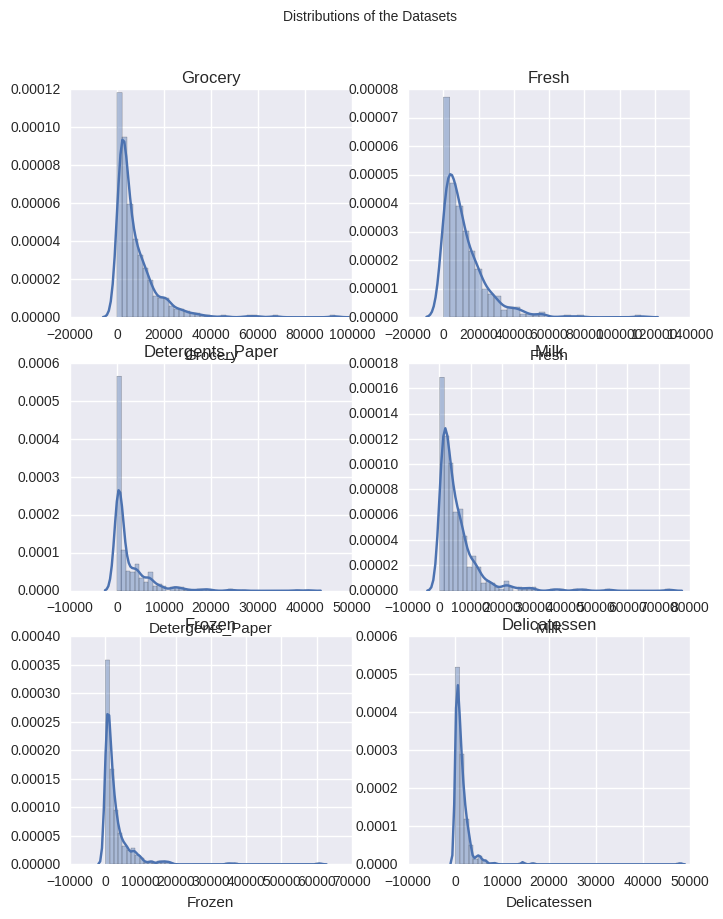

In [163]:
# Produce a scatter matrix for each pair of features in the data
plt.figure()
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#sns.pairplot(data)
plt.figure()
corr = data.corr()
#sns.distplot(data["Fresh"])
sns.heatmap(corr,vmax = 0.9, square=1)
plt.figure()
sns.jointplot(data['Grocery'],data['Milk'])
plt.figure()
sns.jointplot(data['Detergents_Paper'],data['Milk'])
plt.figure()
sns.jointplot(data['Grocery'],data['Fresh'])
plt.figure()
sns.jointplot(data['Grocery'],data['Frozen'])
plt.figure()
distfigure, ax = plt.subplots(3,2)
distfigure.suptitle("Distributions of the Datasets")
ax[0,0].set_title("Grocery")
sns.distplot(data['Grocery'],ax=ax[0,0])
ax[0,1].set_title("Fresh")
sns.distplot(data['Fresh'],ax=ax[0,1])
ax[1,0].set_title("Detergents_Paper")
sns.distplot(data['Detergents_Paper'],ax=ax[1,0])
ax[1,1].set_title("Milk")
sns.distplot(data['Milk'],ax=ax[1,1])
ax[2,0].set_title("Frozen")
sns.distplot(data['Frozen'],ax=ax[2,0])
ax[2,1].set_title("Delicatessen")
sns.distplot(data['Delicatessen'],ax=ax[2,1])
distfigure.set_size_inches(8, 10)
print data.median()
print data.mean()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
The heatmap indicates, that the pairs [Grocery, Milk] and [Detergents_Paper, Milk] are correlated and the pairs [Grocery, Frozen] and [Grocery, Fresh] and not correlated with each other.
Nearer inspection shows, that [Grocery, Milk] with a Pearson's r = 0.73 and [Detergents_Paper, Milk] with a Pearson's r = 0.66 and for both a p almost zero shows that they are related. Therefore one of each component might not neccessary to identify a specific customer.
In contrast, the pairs [Grocery,Fresh] and [Grocery,Frozen] have a Pearson's r = -0.012 and r = -0.04. Which indicates no correlation. Where the  first with a p = 0.8 indicates almost no relation with each other, the latter has a p = 0.4 which implicates that [Grocery, Frozen] are related to each other. 
Looking at the Data, it is skewed to the left and their median values are far over the mean values which might indicate some outliers. Moreover the skewed data shows not normal distribution at all.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

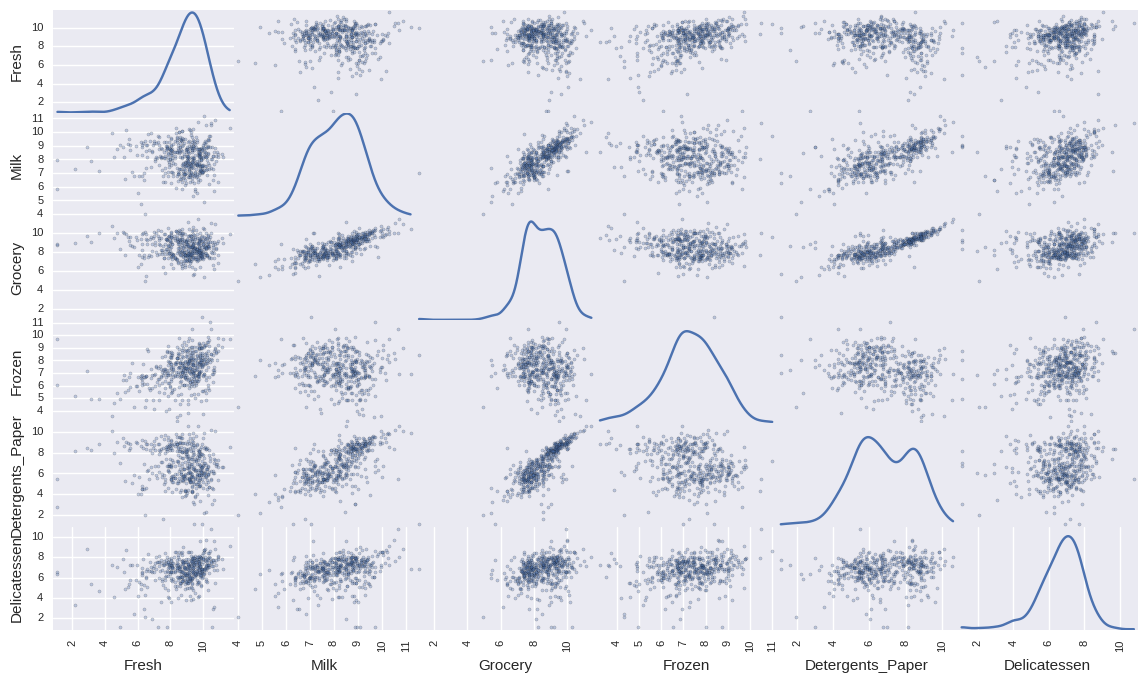

In [164]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [165]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.553930,7.664816,8.144679,7.197435,7.307202,6.306275
1,8.852236,8.263590,8.590444,7.406711,5.765191,7.056175
2,8.561019,8.936298,9.057655,7.839919,8.209036,5.472271


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [166]:
# For each feature find the data points with extreme high or low values
all_outliers = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    the_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(the_outliers)
    
    for i in range(len(the_outliers.index.values)):
        all_outliers.append(the_outliers.index.values[i])

all_outliers.sort()
for i in range(len(all_outliers)-1):
    dif = all_outliers[i]-all_outliers[i+1]
    if dif == 0:
        print all_outliers[i]
        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 128, 154, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


65
66
75
128
154
154


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
Datapoint 65 is an outlier for Fresh and Frozen.
Datapoint 66 is an outlier for Fresh and Delicatessen.
Datapoint 75 is an outlier for Detergent_Papers and Grocery.
Datapoint 128 is an outlier for Fresh and Delicatessen.
Datapoint 154 is an outlier for Delicatessen, Grocery and Milk.

I removed the points 65, 66, 128, and 154. They outliers in pairs which are not correlated and their models failed in Question2. For me they are not relevant for this prediction (they might be in another set of data) and create unneccessary noise.
Initially I thaught, there might be a "deeper" meaning to the dataset, that's why I thaught I could keep 75, since both are correlated and it could be a special customer... Now I just remove it as well, since its just noise.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

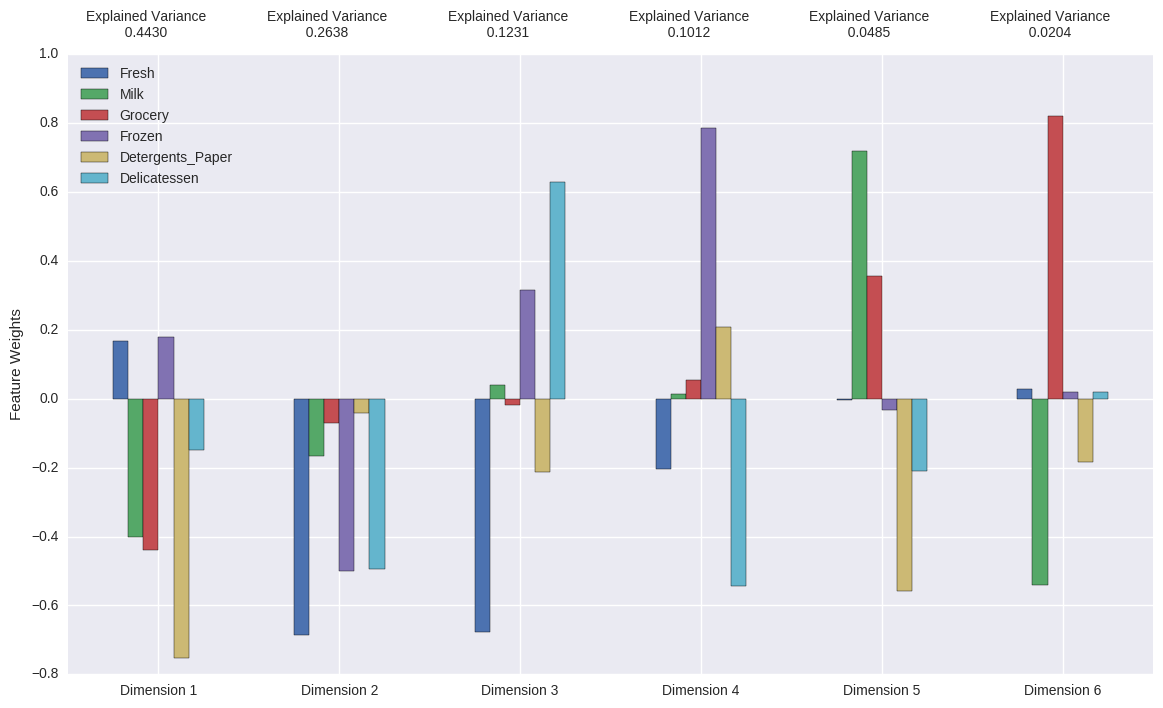

In [167]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
First and second principal component totals about 0.707 of variance of all the data. The first four principal components account for 0.9311 of all the data.
In **Dmension 1** the spending for Detergents_Paper is strongly correlated with about 0.75. It's also correlated with the spending for Grocery and Milk with about 0.4 to 0.5. That means that if the spending for Detergents_Paper is increasing, spending for Grocery and little less for Milk are going to as well. With the strong correlation of Detergents_Paper, Dimension1 represents mostly a measure for the spendings for that feature.  Given that mix, Dimension 1 might be best categorized for a specific type of customer (retailer, maybe)

In **Dimension 2** the spending for Fresh goods shows a good correlation with a loading/weight of about -0.7. It's followed by Frozen and Delicatessen with about -0.5. That means, that an increased spending for Fresh goods might go with an increased spending in Frozen goods and Delicatessen. Dimension 2 represents mainly a measure for Fresh goods and Delicatessen. Taken that mix in account, it might best represent customers of category restaurants.

In **Dimension 3** the spending for Fresh good is as correlated as in Dimension 3, where as the spending for Delicatessen has a negative weight of about the same magnitude. Dimension 3 measures a high spending for Fresh goods but the same time a low spending for Delicatessen. This dimension represents customers with a high amount for Fresh goods, so in gerneral restaurants again.

**Dimension 4** is strongly correlated, about 0.8, with Frozen goods. It's correlated with Delicatessen and a weight of about -0.5. It represents that a high volume of Fresh goods and a low/decreeased spending on Delicatessen. Dimension 4 can represent a retailer for frozen goods.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [168]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.1098,-0.2063,-0.9373,0.0328,-0.6459,-0.0885
1,0.6402,-0.2665,0.4171,-0.3569,0.6419,0.2337
2,-1.4050,0.2498,-0.7442,1.4487,0.2455,-0.2229


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [169]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [170]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.1098,-0.2063
1,0.6402,-0.2665
2,-1.4050,0.2498


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

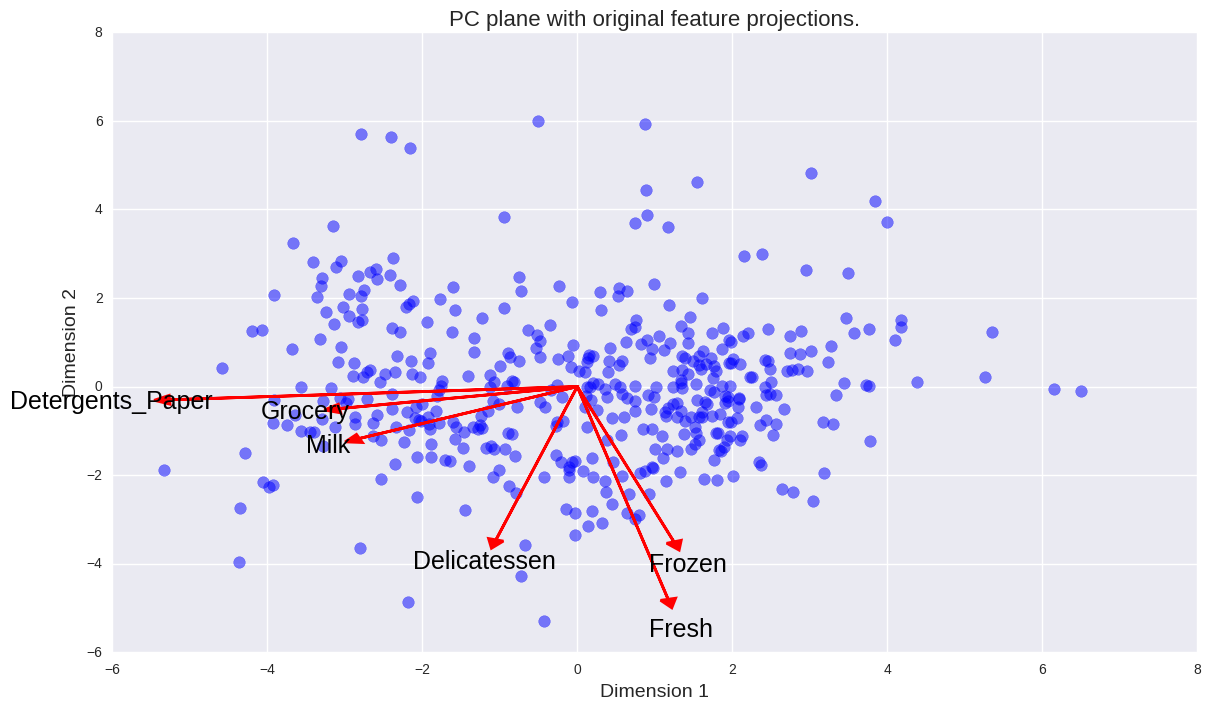

In [171]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means clustering algorithm is fast and easy to implement. It's also very intuitive to understand. Moreover it will find a solution, although it heavily depends on the starting points and therefore might not find the expected one. This algorithm also defines hard clusters, one datapoint either belongs to a cluster or the other other one... There is no in between or maybe. This indicates, that K-Means is sensitive to outliers where they have to belong to a cluster. It might happen, that after two times clustering, the outlier might belong to another cluster after the second time.

The Gaussian Mixture Model clustering is similar to K-Means but it defines soft clusters. It's therefore slower, since it has to take more things to take care of. The advantage of those soft clusters is, that datapoints which are somewhere in between some clusters are indeed somewhere in between and belong to all clusters with a given probability. That also means, that all datapoints belong to all clusters with a specific probability. Also, GMM is able to create non-spherical clusters where K-Means is only able to create spherical ones. With a given variance for each mixture of data and a hypothesis for the probilities the GMM would be a nice way to make accurate  predictions. Given that, I am going to use K-Means since it only needs the clusters as the input. We also found out, that most of the data are correlating in some way and hopefully there won't be any in-between points. Finally I think that the GMM would be too expensive anyway...
(sklean doesn't provide a "centers" attribute for GMM)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

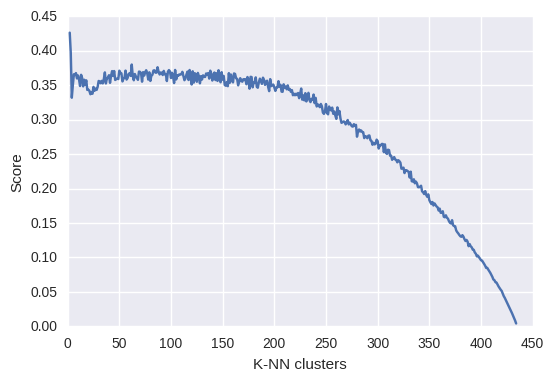

In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
score = []
for i in range(2,435):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = i, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    tpreds = clusterer.predict(reduced_data)
    

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score.append(silhouette_score(reduced_data, tpreds))
    
    if i == 2:
        # TODO: Find the cluster centers
        centers = clusterer.cluster_centers_
        preds = clusterer.predict(reduced_data)
        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)
plt.plot(range(2,435),score)
plt.ylabel("Score")
plt.xlabel("K-NN clusters")

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
The silhouette score shows the highest reading at two clusters. Surprisingly the score plunges to about 0.33 at three clusters. Beyond that the score wouldn't reach a reaeding above 0.38 and would slowly decrease to 0. Never the less, it shows no reading below zero, which would generally indicate a sample has been assigned to a wrong cluster.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

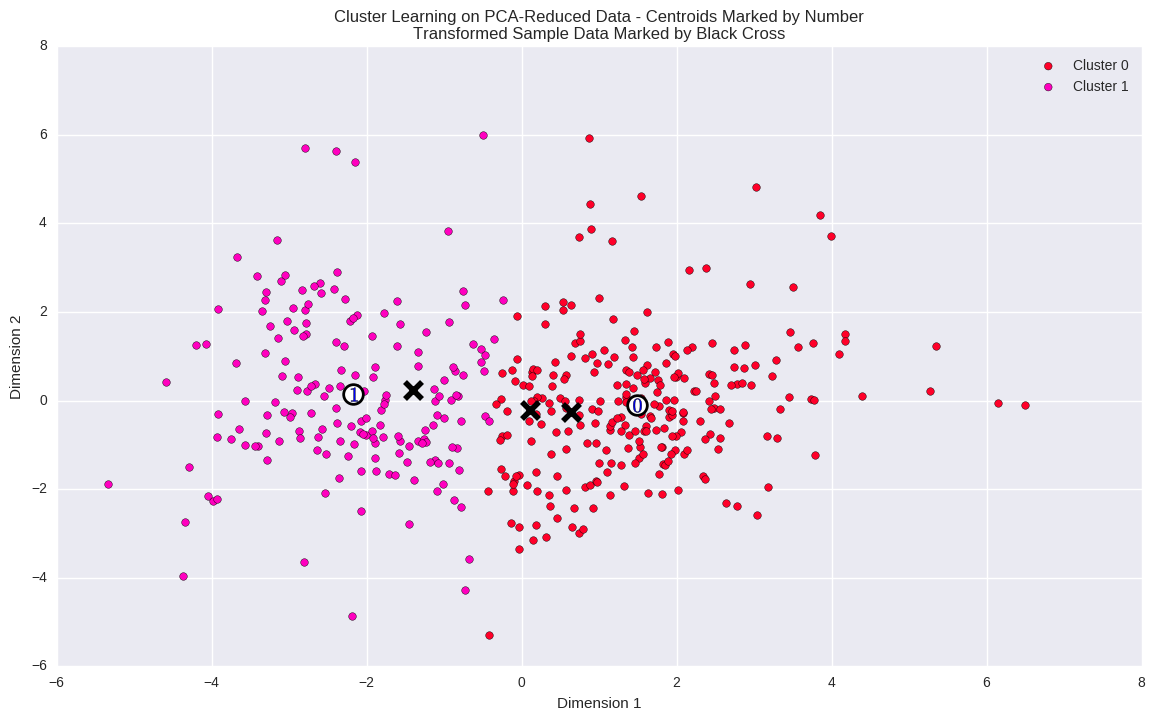

In [173]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


Data from the beginning:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Segment 0 total spendings are: 16304.0
Segment 1 total spendings are: 30558.0


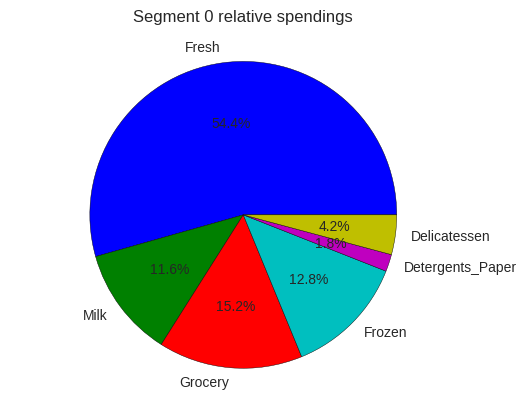

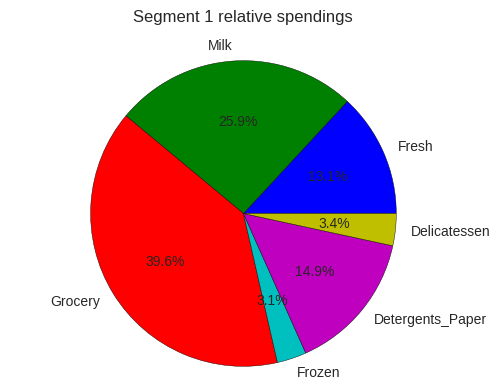

In [174]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print "Data from the beginning:"
display(data.describe())
ratios = []
labels = true_centers.keys()
    
for i in range(len(true_centers.values)):
    total = np.sum(true_centers.values[i])
    print true_centers.index[i] + " total spendings are: " + str(total)
    for value in true_centers.values[i]:
        ratios.append(value/total*100)
    
    plt.pie(ratios, labels=labels, autopct='%1.1f%%')
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title(true_centers.index[i]+" relative spendings",y = 1.1)

    fig = plt.figure()
    del ratios[:]

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 describes a customer who is in:
- slightly above the 25% for spendings on Fresh
- slightly above the 75% for spendings on Milk
- slightly above the 75% for spendings on Grocery
- above the 25% for spendings on Frozen
- above the 75% for spendings on Detergents_Paper
- slightly above the 50% spendings on Delicatessen.
It's mix of spendings is about 40% for Grocery, 25% Milk, 15% Detergents Papers ,13% Fresh and about 3% each for  Delicatessen and Frozen goods.
With that mix, maybe a bed-and-breakfast inn or diner or something in that direction.

Segment 1 describes a customer who is in the:
- 50% for spendings on Fresh
- above 25% spendings on Milk
- above 75% spendings on Grocery
- above 50% spendings on Frozen
- below 25% spendings on Detergents_Paper
- above 25% spendings on Delicatessen
of all datasets.
It's mix of spendings is about 55% for Fresh, 15% for Grocery, 13% for Frozen, 12% for Milk, 4% for Delicatessen and about 2% for Detergents Paper.
With this mix, it could be a restaurant which serves fresh food where the cleaning is outsourced to subcompanies. Or maybe a fresh market.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [175]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
Taken the date from the part where we selected the sample points and compare the relative spendings from each sample with the clusters we would see that it's consistent with the segments in ***Question8***:

| Data            |  Fresh     | Milk       | Grocery      | Frozen       | Detergents_Paper  | Delicatessen  |
|:----------------|:-----------|:-----------|:-------------|:-------------|:------------------|:--------------|
| Segement 0      | 54.4%      | 11.6%      | 15.2%        | **12.8%**    | 1.8%              | 4.2%          |
| **Segement 1**  | 13.1%      | 25.9%      | 39.6%        | **3.1%**     | 14.9%             | 3.4%          |
| Point0 (104)    | 61.2%	   | 9.3%	    | 15.0%	       | 5.8%	      | 6.5%              | 2.4%          |
| Point1 (117)    | 36.1%	   | 20.0%	    | 27.8%        | 8.5%         | 1.6%	          | 6.0%          |
| **Point2 (164)**| 18.7%	   | 27.3%      | 30.8%	       | **9.1%**     | 13.2%	          | 0.9%          |

Although sometimes there are some categories which seem to be a mismatch like the Frozen goods, the overall predictions are consistent and give the results we'd expected. Those minor mismatches can come from the reduction of dimensions. It also makes sense, since none of the samplepoints are completely in the center of the clusters.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The distributer should make this particular adjustment only for customers with low amount of fresh goods and delicatessen, since those are the one who need a daily delivery service (I think).
Customers with Milk (I assume pasteurized or homogenized) and the rest of categories wouldn't mind either.
Also, customers with a high demand would need a more flexible delivery plan.
A positive effect in general is not to expect, only if there are any benefits for the customer(a less attractive delivery schedule isn't very attractive)
With the reviewers hint, to consider the clusters as tool for the A/B testing. And to be successful they products have to be similar, which they aren't. So, one cluster experiment and the other cluster as control doesn't make sense. Therefore I'd choose a subset of one cluster as the experiment and the other set as control. If the customer like the change, it should show an increase of spending of that specific good or of the total spending. For example I would take a two similar sets of segmemt 0 and the spending for Fresh goods decreases, the spendings for Frozen goods increases more and increases the gross you can see a positive effect of that change. Vice versa, a negative. Now it's possible to distinguish if a change could make sense or not. Similar approach for the other segment.
It's a good idea, to take a subset of a cluster, since you loose maximum 25% (if everything is equally clustered) of your customers but can see the effect for each Feature in a bigger picture.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
As we did above the distributer should process,
- feature scaling
- feature transformation
- dimension reduction
- use the clusterer function to precict the cluster and therefore the segment in which each customer might be
Therefore, the target is the cluster.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

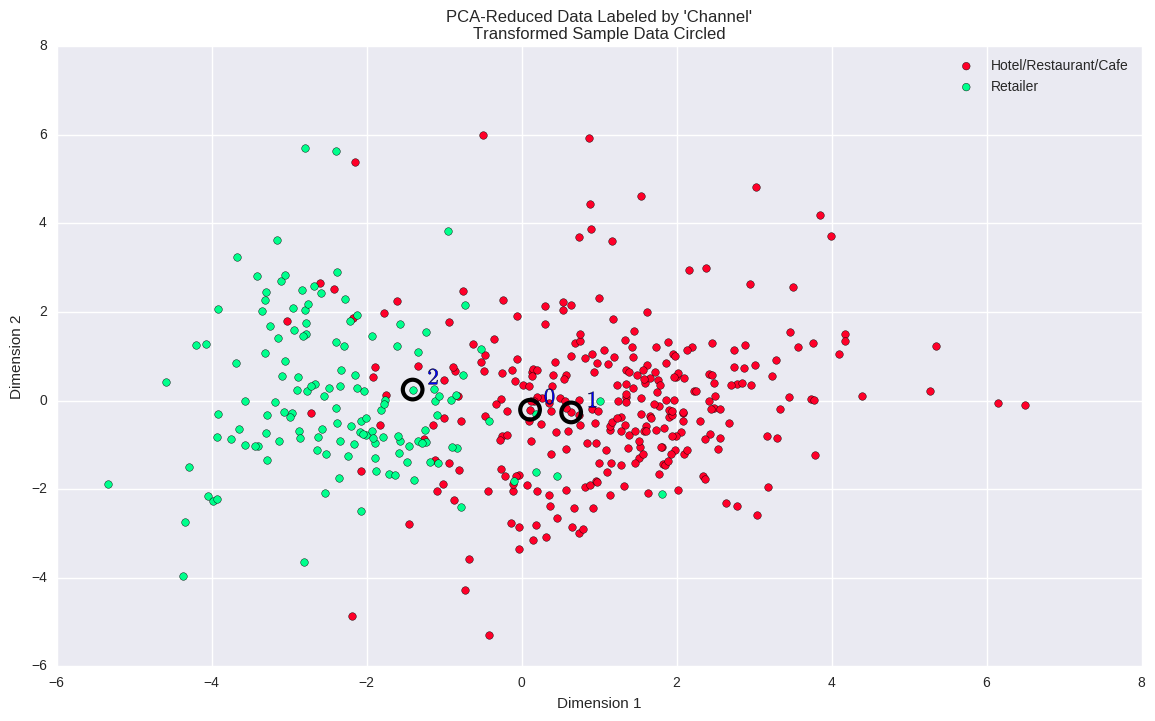

In [177]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
Somehow, my choices seem to be an outliers or at least at the boarders of it... At first, it looks like a big single cluster. Inspecting the axis, explains the variations and how the features correlate with dimensions. What is odd, that cluster 0 (here Hotel/Restaurants/Cafe) contains some datapoints from cluster1 (here Retailers). Although it's a minority it's not satisfying. It would be nice to have another dimension to better distinguish or seperate those better. But there are indeed some who could be classified as pure retailers or the other category. I'd say the ones along dimension1 axis, with one category at -2 and one category at 2. Those are far away from each other and there spendings on product categories vary enough to fall in each category.
Honestly, I expected a much more diversified pictue (two nice circles), or in the beginning it felt like three or four clusters. Later on it became clear just two but still expected more apart from each other. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.